In [1]:
from glob import glob
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import MDAnalysis as mda

In [2]:
# Function to compute the distance between the atoms defining an isopeptide bond

def calculate_isopeptide_distance(pdb_names, sel_A, sel_B):
    """
        Compute distances between the selected atoms. The function
        return multiple values when multiple pdb_names OR multiframe
        pdb-s are used.
         pdb_names : a single pdb or a list of pdb-s
    """
    if type(pdb_names) is not list:
        pdb_names = [pdb_names,]

    u = mda.Universe(
        *pdb_names,
        all_coordinates = True,  # To use also the first frame.
    )

    ag_A = u.select_atoms(sel_A)
    ag_B = u.select_atoms(sel_B)

    distances = np.zeros((u.trajectory.n_frames))
    for i,ts in enumerate(u.trajectory):
        distances[i] = np.linalg.norm(ag_A.positions - ag_B.positions)
    
    return distances

In [3]:
# Compute the isopeptide bond length from the reference structures.

ref_models = [
              '5ymy',
              '6isu',
              '6tuv',
              '6ud0',
              '7keo',
              '7m4n',
              # '7uv5', UNRESOLVED LINKER
              # '7uyh', UNRESOLVED LINKER
              # '9avt', UNRESOLVED LINKER
             ]

ref_linkages = {'5ymy'     : ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
                '6isu'     : ["segid C and resid 27 and name CB", "segid B and resid 76 and name C"],
                '6tuv'     : ["segid H and resid 48 and name CB", "segid D and resid 76 and name C"],
                '6ud0'     : ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                '7keo'     : ["segid C and resid 29 and name CB", "segid D and resid 76 and name C"],
                '7m4n'     : ["segid F and resid 63 and name CB", "segid D and resid 76 and name C"],
                # '7uv5'     : ["segid B and resid 48 and name CB", "segid C and resid 76 and name C"], UNRESOLVED LINKER
                # '7uyh'     : ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"], UNRESOLVED LINKER
                # '9avt'     : ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"], UNRESOLVED LINKER
           }

ref_distances = {}
for ref_model in ref_models:
    print (ref_model)
    linkage = ref_linkages[ref_model]
    d = calculate_isopeptide_distance('references/'+ref_model+'.pdb', linkage[0], linkage[1])
    ref_distances[ref_model] = d

ref_merged = np.concatenate(list(ref_distances.values()))

5ymy
6isu
6tuv
6ud0
7keo
7m4n


In [12]:
# Compute the isopeptide bond length from the AF3 predictions without/with imposed bond.
# As the default AF3 predictions do not know about bonds, the chains must be permuted to
# allow linkages both ways (between A-K48 and B-G76 as well as A-G76 and B-K48)

model_dirs = [
              '5ymy',
              '5ymy-bond',
              '6isu',
              '6isu-bond',
              '6tuv',
              '6tuv-bond',
              '6ud0',
              '6ud0-bond',
              '7keo',
              '7keo-bond',
              '7m4n',
              '7m4n-bond',
              '7uv5',
              '7uv5-bond',
              '7uyh',
              '7uyh-bond',
              '8c61',
              '8c61-bond',    
              '9avt',
              '9avt-bond',
             ]

# Linkages reflecting the bonded connections
linkages = {'5ymy'     : ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
            '5ymy-bond': ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
            '6isu'     : ["segid A and resid 27 and name CB", "segid B and resid 76 and name C"],
            '6isu-bond': ["segid A and resid 27 and name CB", "segid B and resid 76 and name C"],
            '6tuv'     : ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
            '6tuv-bond': ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
            '6ud0'     : ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
            '6ud0-bond': ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
            '7keo'     : ["segid A and resid 29 and name CB", "segid B and resid 76 and name C"],
            '7keo-bond': ["segid A and resid 29 and name CB", "segid B and resid 76 and name C"],
            '7m4n'     : ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
            '7m4n-bond': ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
            '7uv5'     : ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
            '7uv5-bond': ["segid A and resid 48 and name CB", "segid B and resid 76 and name C"],
            '7uyh'     : ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"],
            '7uyh-bond': ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"],
            '8c61'     : ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
            '8c61-bond': ["segid A and resid 63 and name CB", "segid B and resid 76 and name C"],
            '9avt'     : ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"],
            '9avt-bond': ["segid A and resid  6 and name CB", "segid B and resid 76 and name C"],
           }

# Alternative linkages with permuted chainID-s
# NOTE: there's no rerunning for the bonded systems. The entries are here only as placeholders
alt_linkages = {'5ymy'     : ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                '5ymy-bond': ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                '6isu'     : ["segid B and resid 27 and name CB", "segid A and resid 76 and name C"],
                '6isu-bond': ["segid B and resid 27 and name CB", "segid A and resid 76 and name C"],
                '6tuv'     : ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                '6tuv-bond': ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                '6ud0'     : ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                '6ud0-bond': ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                '7keo'     : ["segid B and resid 29 and name CB", "segid A and resid 76 and name C"],
                '7keo-bond': ["segid B and resid 29 and name CB", "segid A and resid 76 and name C"],
                '7m4n'     : ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                '7m4n-bond': ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                '7uv5'     : ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                '7uv5-bond': ["segid B and resid 48 and name CB", "segid A and resid 76 and name C"],
                '7uyh'     : ["segid B and resid  6 and name CB", "segid A and resid 76 and name C"],
                '7uyh-bond': ["segid B and resid  6 and name CB", "segid A and resid 76 and name C"],
                '8c61'     : ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                '8c61-bond': ["segid B and resid 63 and name CB", "segid A and resid 76 and name C"],
                '9avt'     : ["segid B and resid  6 and name CB", "segid A and resid 76 and name C"],
                '9avt-bond': ["segid B and resid  6 and name CB", "segid A and resid 76 and name C"],
           }

linker = 'NBU'

if linker == 'TME':
    linker_suffix = ''
elif linker == 'NBU':
    linker_suffix = '-NBU'

distances = {}
# Loop over all model directories
for model_dir in model_dirs:
    
    print (model_dir)
    if 'bond' in model_dir:
        # Get PDB names, and linkages for selection strings
        pdb_names = glob(f'{model_dir}{linker_suffix}/{model_dir}*pdb')
    else:
        pdb_names = glob(f'{model_dir}/{model_dir}*pdb')
    linkage = linkages[model_dir]
    
    # Compute and store the distnace
    d = calculate_isopeptide_distance(pdb_names, linkage[0], linkage[1])
    distances[model_dir] = d
    
    # Permute the predictions without isopeptide bond
    if not "bond" in model_dir:
        print (f" Permuting {model_dir}")
        linkage = alt_linkages[model_dir]
        d = calculate_isopeptide_distance(pdb_names, linkage[0], linkage[1])
        distances[model_dir] = np.minimum(d, distances[model_dir])

5ymy
 Permuting 5ymy
5ymy-bond
6isu
 Permuting 6isu
6isu-bond
6tuv
 Permuting 6tuv
6tuv-bond
6ud0
 Permuting 6ud0
6ud0-bond
7keo
 Permuting 7keo
7keo-bond
7m4n
 Permuting 7m4n
7m4n-bond
7uv5
 Permuting 7uv5
7uv5-bond
7uyh
 Permuting 7uyh
7uyh-bond
8c61
 Permuting 8c61
8c61-bond
9avt
 Permuting 9avt
9avt-bond


In [13]:
# Transfrom the AF3 model data to pandas DataFrame

import pandas as pd

df = pd.DataFrame (distances)
df = df.melt(var_name='PDB', value_name='distance')
df['bond'] = df['PDB'].apply(lambda x: 'yes' if 'bond' in x else 'no')
df['PDB'] = df['PDB'].str.replace('-bond', '', regex=True)

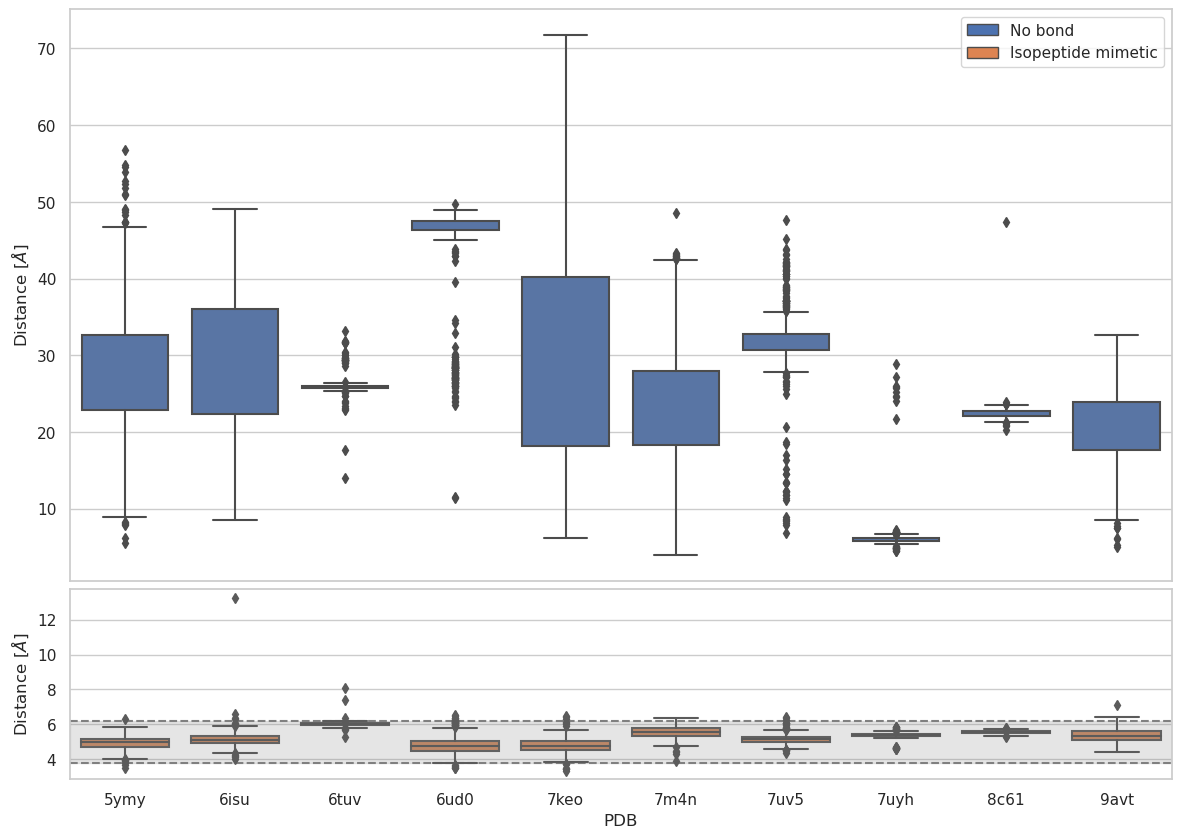

In [16]:
# Plot the distances

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn
plt.rcParams['svg.fonttype'] = 'none'
# Get the default color palette
colors = seaborn.color_palette()


fig = plt.figure(layout="constrained")

gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[:3, :])
ax2 = fig.add_subplot(gs[3, :])

 
# use to set style of background of plot
seaborn.set_theme(rc={'figure.figsize':(11.7,8.27)})
seaborn.set(style="whitegrid")
seaborn.boxplot(x="PDB", y="distance", hue="bond", data=df[df.iloc[:, 2] == "no"], medianprops={"color": "r", "linewidth": 0}, ax=ax1)
ax1.set_ylabel(r'Distance [$\AA$]')
ax1.set_xlabel(None)
ax1.get_xaxis().set_ticks([])
ax1.legend(title=None, labels=['No bond', 'Isopeptide mimetic'])
leg = ax1.get_legend()
leg.legendHandles[0].set_facecolor(colors[0])
leg.legendHandles[1].set_facecolor(colors[1])
leg.legendHandles[0].set_linewidth(1)
leg.legendHandles[1].set_linewidth(1)

#ax2.fill_between([-0.5,7.5], ref_merged.min(), ref_merged.max(), alpha=0.5)
seaborn.set_theme(rc={'figure.figsize':(11.7,8.27)})
seaborn.set(style="whitegrid")
ax2.axhspan(ref_merged.min(), ref_merged.max(), color='gray', alpha=0.2)
ax2. axhline(y=ref_merged.min(), color='gray', linestyle='--', label='y=10')
ax2. axhline(y=ref_merged.max(), color='gray', linestyle='--', label='y=10')
seaborn.boxplot(x="PDB", y="distance", data=df[df.iloc[:, 2] == "yes"], color=colors[1], ax=ax2)
ax2.set_ylabel(r'Distance [$\AA$]')

# Fill using the PDB disulfide lengths

plt.savefig(f"AF3-isopeptide-bonds{linker_suffix}.svg", bbox_inches=0, transparent=True)
plt.savefig(f"AF3-isopeptide-bonds{linker_suffix}.png", bbox_inches=0, transparent=True)
plt.show()

